In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from propitious import Propitious, plot_propitious_selection

# Income

In [9]:
df = pd.read_excel("..\data\compas_enquete_mll.xlsx")
df.totincome.describe()

count    1.296000e+03
mean     1.194043e+05
std      5.568754e+05
min      1.000000e+00
25%      4.500000e+04
50%      7.400000e+04
75%      1.050000e+05
max      1.500000e+07
Name: totincome, dtype: float64

# Using pr_nhome_compas
We adjust the probability of nursing home to be smaller or equal to the probablity of probability of survival to 85 years old.

In [10]:
df = pd.read_excel("..\data\compas_enquete_mll.xlsx")
df.rename(columns={'pr_nhome_compas': 'alpha1',
                   'pr_alive_85_compas': 'pi'},
          inplace=True)

print(f'prob dependency before 85: {(df.alpha1 > df.pi).mean()}')
df['alpha1'] = df[['alpha1', 'pi']].min(axis='columns')
df['alpha2'] = df.pi - df.alpha1
df['death'] = 1 - df.alpha1 - df.alpha2
df = df[['alpha1', 'alpha2', 'death']]
df.describe()

prob dependency before 85: 0.002


,alpha1,alpha2,death
count,2000.000000,2000.000000,2000.000000
mean,0.262085,0.385839,0.352076
std,0.112263,0.159902,0.119342
min,0.055000,0.000000,0.125000
25%,0.167500,0.267500,0.260000
50%,0.255000,0.332500,0.340000
75%,0.350000,0.562500,0.425625
max,0.522500,0.697500,0.937500


## Find propitious selection

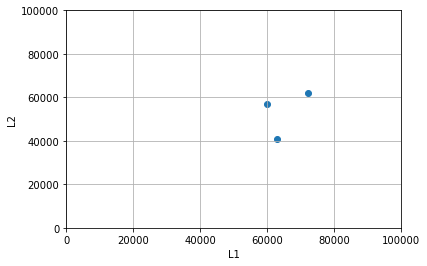

In [11]:
w = 72000

l_propitious_nhome = []
for L1 in np.arange(0, w + 1, 1000): # 1000
    for L2 in np.arange(0, L1, 1000): # 1000
        propitious = Propitious(w, df.alpha1, df.alpha2, L1, L2)
        if propitious.check_propitious_selection(price_change=750):
            l_propitious_nhome.append((L1, L2))
plot_propitious_selection(l_propitious_nhome)

In [12]:
for L1, L2 in l_propitious_nhome:
    propitious = Propitious(w, df.alpha1, df.alpha2, L1, L2)
    propitious_prices = propitious.find_prices_profits_propitious_selection(step=50)
    print(f'L1={L1}, L2={L2}')
    display(propitious_prices)    

L1=60000, L2=57000


,price,profit,remark
5,45650,6526058.0,max profit
0,54150,102110.0,propitious selection
1,54300,73134.0,propitious selection
2,54450,48917.0,propitious selection
3,54600,42684.0,propitious selection
4,54700,16837.0,propitious selection


L1=63000, L2=41000


,price,profit,remark
3,38850,6074960.0,max profit
0,51850,51663.0,propitious selection
1,52250,30913.0,propitious selection
2,52400,24315.0,propitious selection


L1=72000, L2=62000


,price,profit,remark
0,60700,30522057.0,propitious selection
1,61200,30564976.0,propitious selection
2,61750,30725309.0,propitious selection
3,61950,30747472.0,propitious selection
4,62000,30800981.0,propitious selection
36,62050,30850995.0,max profit
5,62250,30703148.0,propitious selection
6,62450,30499440.0,propitious selection
7,62600,30487618.0,propitious selection
8,62750,30263103.0,propitious selection
